**Sequence alignments**

**Operations on an alignment**

In [8]:
!pip install biopython

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 32.6 MB/s eta 0:00:00


In [15]:
import numpy as np
from Bio.Align import Alignment
seqA = "CCGGTTTTT"
seqB = "AGTTTAA"
seqC = "AGGTTT"
sequences = [seqA, seqB, seqC]
coordinates = np.array([[1, 3, 4, 7, 9], [0, 2, 2, 5, 5], [0, 2, 3, 6, 6]])
alignment = Alignment(sequences, coordinates)
alignment

<Alignment object (3 rows x 8 columns) at 0x7c307e32e650>

In [16]:
print(alignment)

                  1 CGGTTTTT 9
                  0 AG-TTT-- 5
                  0 AGGTTT-- 6



In [17]:
alignment.sort()
print(alignment)

                  0 AGGTTT-- 6
                  0 AG-TTT-- 5
                  1 CGGTTTTT 9



**Adding alignments**

In [18]:
from Bio.Seq import Seq
from Bio.SeqRecord import SeqRecord
a1 = SeqRecord(Seq("AAAAC"), id="Alpha")
b1 = SeqRecord(Seq("AAAC"), id="Beta")
c1 = SeqRecord(Seq("AAAAG"), id="Gamma")
a2 = SeqRecord(Seq("GTT"), id="Alpha")
b2 = SeqRecord(Seq("TT"), id="Beta")
c2 = SeqRecord(Seq("GT"), id="Gamma")
left = Alignment(
    [a1, b1, c1], coordinates=np.array([[0, 3, 4, 5], [0, 3, 3, 4], [0, 3, 4, 5]])
)
left.annotations = {"tool": "demo", "name": "start"}
left.column_annotations = {"stats": "CCCXC"}
right = Alignment(
    [a2, b2, c2], coordinates=np.array([[0, 1, 2, 3], [0, 0, 1, 2], [0, 1, 1, 2]])
)
right.annotations = {"tool": "demo", "name": "end"}
right.column_annotations = {"stats": "CXC"}

In [19]:
print(left)

Alpha             0 AAAAC 5
Beta              0 AAA-C 4
Gamma             0 AAAAG 5



In [20]:
print(right)

Alpha             0 GTT 3
Beta              0 -TT 2
Gamma             0 G-T 2



In [21]:
combined = left + right
print(combined)

Alpha             0 AAAACGTT 8
Beta              0 AAA-C-TT 6
Gamma             0 AAAAGG-T 7



In [22]:
combined.annotations

{'tool': 'demo'}

In [23]:
combined.column_annotations

{'stats': 'CCCXCCXC'}

**Mapping a pairwise sequence alignment**

In [24]:
chromosome = "AAAAAAAACCCCCCCAAAAAAAAAAAGGGGGGAAAAAAAA"
transcript = "CCCCCCCGGGGGG"
sequences1 = [chromosome, transcript]
coordinates1 = np.array([[8, 15, 26, 32], [0, 7, 7, 13]])
alignment1 = Alignment(sequences1, coordinates1)
print(alignment1)

target            8 CCCCCCCAAAAAAAAAAAGGGGGG 32
                  0 |||||||-----------|||||| 24
query             0 CCCCCCC-----------GGGGGG 13



In [25]:
rnaseq = "CCCCGGGG"
sequences2 = [transcript, rnaseq]
coordinates2 = np.array([[3, 11], [0, 8]])
alignment2 = Alignment(sequences2, coordinates2)
print(alignment2)

target            3 CCCCGGGG 11
                  0 ||||||||  8
query             0 CCCCGGGG  8



In [26]:
alignment3 = alignment1.map(alignment2)
print(alignment3)

target           11 CCCCAAAAAAAAAAAGGGG 30
                  0 ||||-----------|||| 19
query             0 CCCC-----------GGGG  8



In [27]:
print(alignment3.coordinates)

[[11 15 26 30]
 [ 0  4  4  8]]


**Reading and writing alignments**

In [35]:
#https://github.com/biopython/biopython/blob/master/Tests/MAF/ucsc_mm9_chr10.maf
from Bio import Align
alignments = Align.parse("MAF/ucsc_mm9_chr10.maf", "maf")
alignments

In [36]:
alignments.metadata

{'MAF Version': '1', 'Scoring': 'autoMZ.v1'}

In [38]:
for a in alignments:
    print(len(a.sequences))

2
4
5
6
7
7
1
4
1
5
6
4
1
9
10
7
1
3
1
4
3
5
1
2
2
1
2
3
6
5
1
2
7
10
1
4
1
9
10
11
12
13
14
15
15
14
7
6


In [39]:
len(alignments)

48

In [40]:
alignment_list = list(alignments)
len(alignment_list)

48

In [41]:
alignment_list[27]

<Alignment object (3 rows x 91 columns) at 0x7c307c126860>

In [42]:
print(alignment_list[27])

mm9.chr10   3019377 CCCCAGCATTCTGGCAGACACAGTG-AAAAGAGACAGATGGTCACTAATAAAATCTGT-A
felCat3.s     46845 CCCAAGTGTTCTGATAGCTAATGTGAAAAAGAAGCATGTGCCCACCAGTAAGCTTTGTGG
canFam2.c  47545247 CCCAAGTGTTCTGATTGCCTCTGTGAAAAAGAAACATGGGCCCGCTAATAagatttgcaa

mm9.chr10   3019435 TAAATTAG-ATCTCAGAGGATGGATGGACCA  3019465
felCat3.s     46785 TGAACTAGAATCTCAGAGGATG---GGACTC    46757
canFam2.c  47545187 tgacctagaatctcagaggatg---ggactc 47545159



In [44]:
type(alignments)

Bio.Align.maf.AlignmentIterator

In [45]:
alignments = alignments[:]
type(alignments)

Bio.Align.Alignments

In [47]:
len(alignments)

48

In [48]:
print(alignments[11])

mm9.chr10   3014742 AAGTTCCCTCCATAATTCCTTCCTCCCACCCCCACA 3014778
calJac1.C      6283 AAATGTA-----TGATCTCCCCATCCTGCCCTG---    6311
otoGar1.s    175262 AGATTTC-----TGATGCCCTCACCCCCTCCGTGCA  175231
loxAfr1.s      9317 AGGCTTA-----TG----CCACCCCCCACCCCCACA    9290



In [49]:
alignments.metadata

{'MAF Version': '1', 'Scoring': 'autoMZ.v1'}

**Writing alignments**

In [50]:
from Bio import Align
target = "myfile.txt"
Align.write(alignments, target, "clustal")

48

In [51]:
from Bio import Align
alignments = Align.Alignments(alignments)
metadata = {"Program": "Biopython", "Version": "1.81"}
alignments.metadata = metadata
target = "myfile.txt"
Align.write(alignments, target, "clustal")

48

In [52]:
str(alignment)

'                  0 AGGTTT-- 6\n                  0 AG-TTT-- 5\n                  1 CGGTTTTT 9\n'

In [54]:
format(alignment)

'                  0 AGGTTT-- 6\n                  0 AG-TTT-- 5\n                  1 CGGTTTTT 9\n'

In [55]:
print(format(alignment))

                  0 AGGTTT-- 6
                  0 AG-TTT-- 5
                  1 CGGTTTTT 9



In [56]:
format(alignment, "clustal")

'sequence_0                          AGGTTT--\nsequence_1                          AG-TTT--\nsequence_2                          CGGTTTTT\n\n\n'

In [57]:
print(format(alignment, "clustal"))

sequence_0                          AGGTTT--
sequence_1                          AG-TTT--
sequence_2                          CGGTTTTT





In [58]:
print(f"*** this is the alignment in Clustal format: ***\n{alignment:clustal}\n***")

*** this is the alignment in Clustal format: ***
sequence_0                          AGGTTT--
sequence_1                          AG-TTT--
sequence_2                          CGGTTTTT



***


In [59]:
format(alignment, "maf")

'a\ns sequence_0 0 6 + 6 AGGTTT--\ns sequence_1 0 5 + 7 AG-TTT--\ns sequence_2 1 8 + 9 CGGTTTTT\n\n'

In [60]:
print(format(alignment, "maf"))

a
s sequence_0 0 6 + 6 AGGTTT--
s sequence_1 0 5 + 7 AG-TTT--
s sequence_2 1 8 + 9 CGGTTTTT




**Alignment file formats**

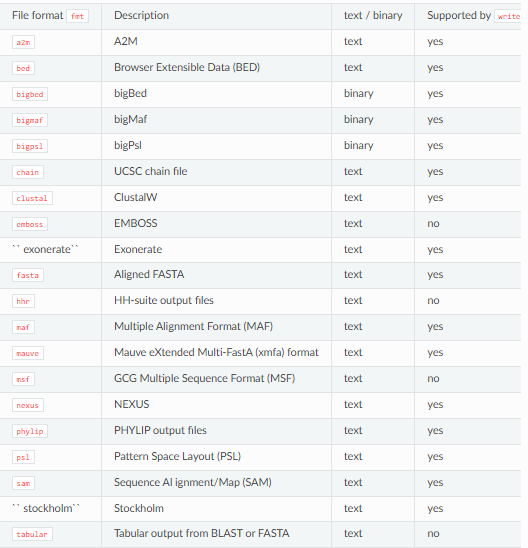



**Aligned FASTA**

In [63]:
#https://github.com/biopython/biopython/blob/master/Tests/Clustalw/probcons.fa
from Bio import Align
alignment = Align.read("probcons.fa", "fasta")
alignment

<Alignment object (5 rows x 101 columns) at 0x7c3061adf370>

In [64]:
print(alignment)

plas_horv         0 D-VLLGANGGVLVFEPNDFSVKAGETITFKNNAGYPHNVVFDEDAVPSG-VD-VSKISQE
plas_chlr         0 --VKLGADSGALEFVPKTLTIKSGETVNFVNNAGFPHNIVFDEDAIPSG-VN-ADAISRD
plas_anav         0 --VKLGSDKGLLVFEPAKLTIKPGDTVEFLNNKVPPHNVVFDAALNPAKSADLAKSLSHK
plas_proh         0 VQIKMGTDKYAPLYEPKALSISAGDTVEFVMNKVGPHNVIFDK--VPAG-ES-APALSNT
azup_achc         0 VHMLNKGKDGAMVFEPASLKVAPGDTVTFIPTDK-GHNVETIKGMIPDG-AE-A------

plas_horv        57 EYLTAPGETFSVTLTV---PGTYGFYCEPHAGAGMVGKVTV 95
plas_chlr        56 DYLNAPGETYSVKLTA---AGEYGYYCEPHQGAGMVGKIIV 94
plas_anav        58 QLLMSPGQSTSTTFPADAPAGEYTFYCEPHRGAGMVGKITV 99
plas_proh        56 KLRIAPGSFYSVTLGT---PGTYSFYCTPHRGAGMVGTITV 94
azup_achc        51 -FKSKINENYKVTFTA---PGVYGVKCTPHYGMGMVGVVEV 88



In [65]:
print(format(alignment, "fasta"))

>plas_horvu
D-VLLGANGGVLVFEPNDFSVKAGETITFKNNAGYPHNVVFDEDAVPSG-VD-VSKISQEEYLTAPGETFSVTLTV---PGTYGFYCEPHAGAGMVGKVTV
>plas_chlre
--VKLGADSGALEFVPKTLTIKSGETVNFVNNAGFPHNIVFDEDAIPSG-VN-ADAISRDDYLNAPGETYSVKLTA---AGEYGYYCEPHQGAGMVGKIIV
>plas_anava
--VKLGSDKGLLVFEPAKLTIKPGDTVEFLNNKVPPHNVVFDAALNPAKSADLAKSLSHKQLLMSPGQSTSTTFPADAPAGEYTFYCEPHRGAGMVGKITV
>plas_proho
VQIKMGTDKYAPLYEPKALSISAGDTVEFVMNKVGPHNVIFDK--VPAG-ES-APALSNTKLRIAPGSFYSVTLGT---PGTYSFYCTPHRGAGMVGTITV
>azup_achcy
VHMLNKGKDGAMVFEPASLKVAPGDTVTFIPTDK-GHNVETIKGMIPDG-AE-A-------FKSKINENYKVTFTA---PGVYGVKCTPHYGMGMVGVVEV



In [66]:
print(format(alignment, "clustal"))

plas_horvu                          D-VLLGANGGVLVFEPNDFSVKAGETITFKNNAGYPHNVVFDEDAVPSG-
plas_chlre                          --VKLGADSGALEFVPKTLTIKSGETVNFVNNAGFPHNIVFDEDAIPSG-
plas_anava                          --VKLGSDKGLLVFEPAKLTIKPGDTVEFLNNKVPPHNVVFDAALNPAKS
plas_proho                          VQIKMGTDKYAPLYEPKALSISAGDTVEFVMNKVGPHNVIFDK--VPAG-
azup_achcy                          VHMLNKGKDGAMVFEPASLKVAPGDTVTFIPTDK-GHNVETIKGMIPDG-

plas_horvu                          VD-VSKISQEEYLTAPGETFSVTLTV---PGTYGFYCEPHAGAGMVGKVT
plas_chlre                          VN-ADAISRDDYLNAPGETYSVKLTA---AGEYGYYCEPHQGAGMVGKII
plas_anava                          ADLAKSLSHKQLLMSPGQSTSTTFPADAPAGEYTFYCEPHRGAGMVGKIT
plas_proho                          ES-APALSNTKLRIAPGSFYSVTLGT---PGTYSFYCTPHRGAGMVGTIT
azup_achcy                          AE-A-------FKSKINENYKVTFTA---PGVYGVKCTPHYGMGMVGVVE

plas_horvu                          V
plas_chlre                          V
plas_anava                          V
plas_proho    

In [67]:
alignment.sequences

[SeqRecord(seq=Seq('DVLLGANGGVLVFEPNDFSVKAGETITFKNNAGYPHNVVFDEDAVPSGVDVSKI...VTV'), id='plas_horvu', name='<unknown name>', description='', dbxrefs=[]),
 SeqRecord(seq=Seq('VKLGADSGALEFVPKTLTIKSGETVNFVNNAGFPHNIVFDEDAIPSGVNADAIS...IIV'), id='plas_chlre', name='<unknown name>', description='', dbxrefs=[]),
 SeqRecord(seq=Seq('VKLGSDKGLLVFEPAKLTIKPGDTVEFLNNKVPPHNVVFDAALNPAKSADLAKS...ITV'), id='plas_anava', name='<unknown name>', description='', dbxrefs=[]),
 SeqRecord(seq=Seq('VQIKMGTDKYAPLYEPKALSISAGDTVEFVMNKVGPHNVIFDKVPAGESAPALS...ITV'), id='plas_proho', name='<unknown name>', description='', dbxrefs=[]),
 SeqRecord(seq=Seq('VHMLNKGKDGAMVFEPASLKVAPGDTVTFIPTDKGHNVETIKGMIPDGAEAFKS...VEV'), id='azup_achcy', name='<unknown name>', description='', dbxrefs=[])]

In [68]:
print(alignment.coordinates)

[[ 0  1  1 33 34 42 44 48 48 50 50 51 58 73 73 95]
 [ 0  0  0 32 33 41 43 47 47 49 49 50 57 72 72 94]
 [ 0  0  0 32 33 41 43 47 48 50 51 52 59 74 77 99]
 [ 0  1  2 34 35 43 43 47 47 49 49 50 57 72 72 94]
 [ 0  1  2 34 34 42 44 48 48 50 50 51 51 66 66 88]]


In [69]:
from io import StringIO
stream = StringIO()
Align.write(alignment, stream, "FASTA")

1

In [70]:
print(stream.getvalue())

>plas_horvu
D-VLLGANGGVLVFEPNDFSVKAGETITFKNNAGYPHNVVFDEDAVPSG-VD-VSKISQEEYLTAPGETFSVTLTV---PGTYGFYCEPHAGAGMVGKVTV
>plas_chlre
--VKLGADSGALEFVPKTLTIKSGETVNFVNNAGFPHNIVFDEDAIPSG-VN-ADAISRDDYLNAPGETYSVKLTA---AGEYGYYCEPHQGAGMVGKIIV
>plas_anava
--VKLGSDKGLLVFEPAKLTIKPGDTVEFLNNKVPPHNVVFDAALNPAKSADLAKSLSHKQLLMSPGQSTSTTFPADAPAGEYTFYCEPHRGAGMVGKITV
>plas_proho
VQIKMGTDKYAPLYEPKALSISAGDTVEFVMNKVGPHNVIFDK--VPAG-ES-APALSNTKLRIAPGSFYSVTLGT---PGTYSFYCTPHRGAGMVGTITV
>azup_achcy
VHMLNKGKDGAMVFEPASLKVAPGDTVTFIPTDK-GHNVETIKGMIPDG-AE-A-------FKSKINENYKVTFTA---PGVYGVKCTPHYGMGMVGVVEV

